In [1]:
import pandas as pd
import numpy as np

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import scipy

In [4]:
from scipy import stats

In [112]:
import seaborn as sns


In [50]:
pip install --upgrade plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
import plotly as ply

In [79]:
from plotly.subplots import make_subplots

In [91]:
import plotly.express as px 

In [81]:
df=pd.read_csv('C:/Users/ss/Downloads/Task 1/retail_sales_dataset.csv')
df.sample(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
644,645,2023-11-17,CUST645,Female,35,Electronics,4,30,120
380,381,2023-07-09,CUST381,Female,44,Clothing,4,25,100
166,167,2023-09-17,CUST167,Female,43,Clothing,3,50,150
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
809,810,2023-11-30,CUST810,Male,59,Electronics,4,25,100
694,695,2023-08-12,CUST695,Female,22,Electronics,3,50,150
375,376,2023-05-16,CUST376,Female,64,Beauty,1,30,30
564,565,2023-11-07,CUST565,Female,45,Beauty,2,30,60
949,950,2023-11-07,CUST950,Male,36,Clothing,3,300,900
454,455,2023-07-01,CUST455,Male,31,Electronics,4,25,100


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Summary Statistics

Next, we will use the `describe()` function to get a summary of the numerical features in the dataset. This will provide us with useful information such as:
- The mean, median, and standard deviation for each numerical column.
- The minimum and maximum values for each feature.
- The 25th, 50th, and 75th percentiles.

This helps us understand the distribution of data and detect potential outliers.


In [12]:
df.describe(include="all")


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


### Data Cleaning

## missing values
## Duplicates
## Formatting

In [13]:
df.isnull().sum()
# no Nulls

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [14]:
df.duplicated().sum()
# No dulpication

0

In [15]:
df.dtypes
# date

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Total Amount'] = pd.to_numeric(df['Total Amount'].astype('float64'))
df.dtypes
# edit the data types

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount               float64
dtype: object

In [24]:
df['Product Category'].values


['Beauty', 'Clothing', 'Electronics', 'Clothing', 'Beauty', ..., 'Clothing', 'Beauty', 'Beauty', 'Electronics', 'Electronics']
Length: 1000
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']

In [25]:
df['Gender'].values

['Male', 'Female', 'Male', 'Male', 'Male', ..., 'Male', 'Male', 'Female', 'Female', 'Male']
Length: 1000
Categories (2, object): ['Female', 'Male']

In [19]:
df['Product Category'] = df['Product Category'].astype('category')
df['Gender'] = df['Gender'].astype('category')


In [26]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount               float64
dtype: object

### Exploratory Data Analysis

### Univariate analysis

# Univariate analysis is the process of analyzing one variable at a time. It helps us understand the characteristics of individual features in a dataset.

## Distrbution
1. Distribution
Distribution refers to how the values of a variable are spread across different intervals. For numerical variables, we use plots like histograms or KDE (Kernel Density Estimation) plots to visualize the distribution. For categorical variables, we use bar plots to show the frequency of each category.

Numerical Data: Histograms and KDE plots show the shape of the data, the spread, and any skewness.
Categorical Data: Bar plots show how many times each category appears in the data.

## Outliers
2. Outliers
Outliers are values that are much higher or lower than most of the other values. These can affect the analysis or modeling.

Numerical Data: We can detect outliers using box plots. Outliers are displayed as points outside the "whiskers" of the box plot.
Categorical Data: Outliers can be categories with very few instances. We can check for categories that have very low counts.

# 1. Numerical data

In [27]:

df['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

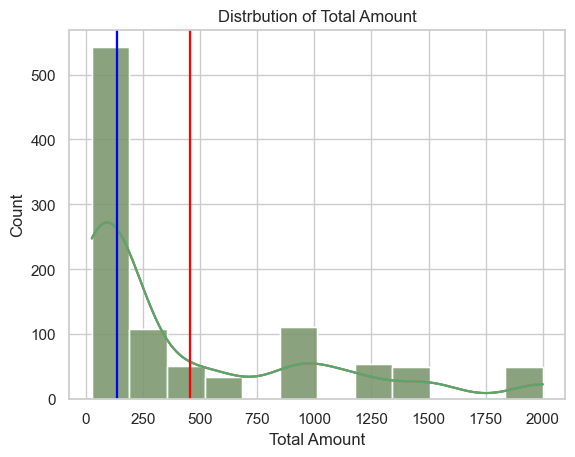

In [236]:
sns.histplot(data=df , x=df['Total Amount'],kde=True)
plt.title('Distrbution of Total Amount')
plt.axvline(df['Total Amount'].mean(),color="red")
plt.axvline(df['Total Amount'].median(),color="blue")
plt.show()


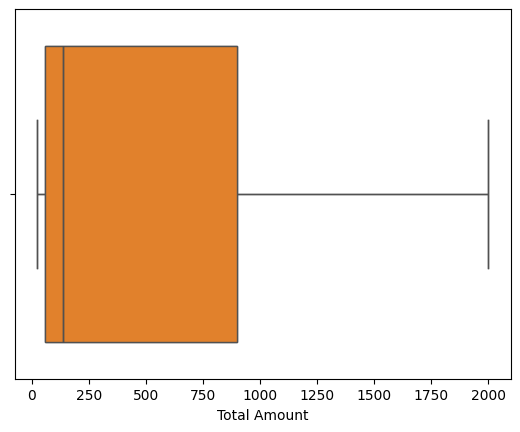

In [32]:
sns.boxplot(data=df,x=df['Total Amount'])
plt.show()

# 2. categorical data 


In [33]:
Pd_Category = df['Product Category'].value_counts()
Pd_Category

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

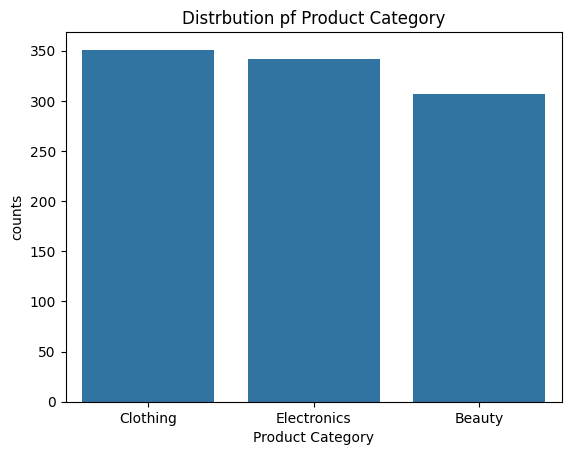

In [36]:
sns.barplot(x=Pd_Category.index, y=Pd_Category.values)
plt.ylabel('counts')
plt.title('Distrbution pf Product Category')
plt.show()

In [62]:
Pd_Category = Pd_Category[ Pd_Category > 0 ]
Pd_Category

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [58]:
print((Pd_Category == 0).sum())

0


In [82]:
print(Pd_Category.isna().sum())

0


In [103]:
print(Pd_Category.index)  # Check labels (categories)
print(Pd_Category.values)  # Check values (counts/frequencies)

Index(['Clothing', 'Electronics', 'Beauty'], dtype='object', name='Product Category')
[351 342 307]


In [104]:
%matplotlib inline

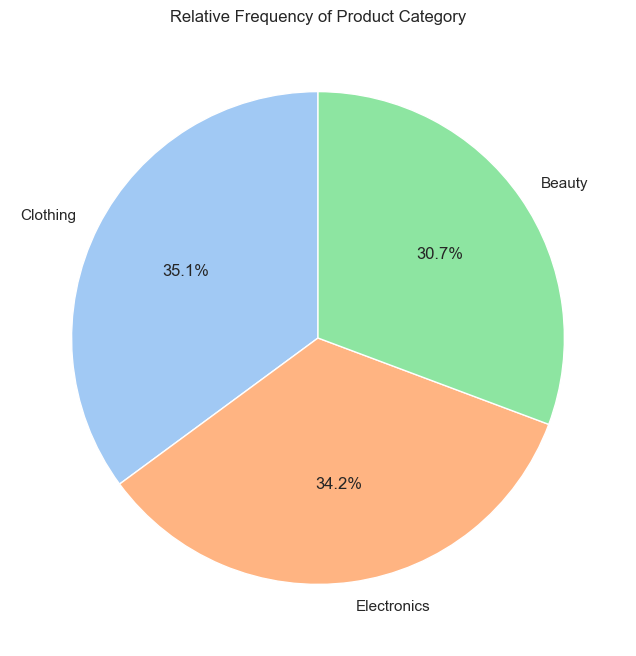

In [225]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Assuming Pd_Category is your data
labels = Pd_Category.index
sizes = Pd_Category.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(labels)))

# Add a title
plt.title("Relative Frequency of Product Category")

# Show the pie chart
plt.show()

### Bivariate analysis

# Bivariate analysis is the process of analyzing the relationship between two variables. This helps us understand how one variable affects or is related to another, which is useful for building predictive models or discovering correlations.

# PD_category vs total price
# quantity vs price per unit 
# Total amount vs Gender
# Total amount vs Age group
# Customer vs Total Amount
# Time series 

In [106]:
total_amount_by_category=df.groupby('Product Category',as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
total_amount_by_category

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


In [119]:
total_amount_by_category.describe()


,Total Amount
count,3.000000
mean,152000.000000
std,7378.029886
min,143515.000000
25%,149547.500000
50%,155580.000000
75%,156242.500000
max,156905.000000


C:\Users\ss\AppData\Local\Temp\ipykernel_10992\2771789606.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




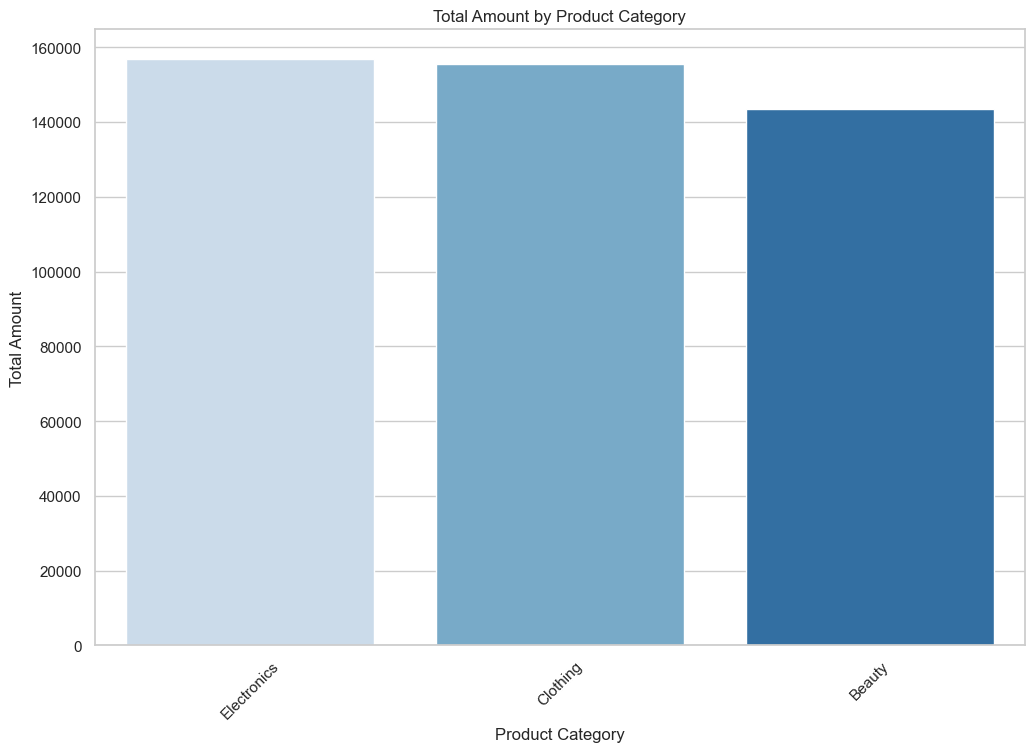

In [229]:
# Create the barplot using seaborn
plt.figure(figsize=(12, 8))  # Optional: Adjust figure size
sns.barplot(data=total_amount_by_category, x='Product Category', y='Total Amount', palette='Blues')

# Set the title of the plot
plt.title('Total Amount by Product Category')

# Optional: Rotate x-axis labels if necessary for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [230]:
quantity_price_data=df.groupby('Quantity',as_index=False)['Price per Unit'].mean().sort_values(by='Price per Unit',ascending=False)
quantity_price_data
#higher quantity in the third row, the price per unit is slightly lower compared to the first row.

,Quantity,Price per Unit
2,3,199.564315
0,1,177.094862
3,4,176.673004
1,2,166.769547


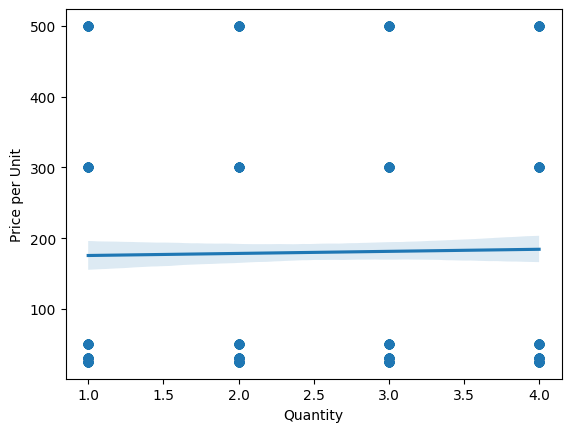

In [117]:
sns.regplot(x='Quantity', y='Price per Unit', data=df, marker='o', scatter=True, )
plt.show()
# no significant relationship

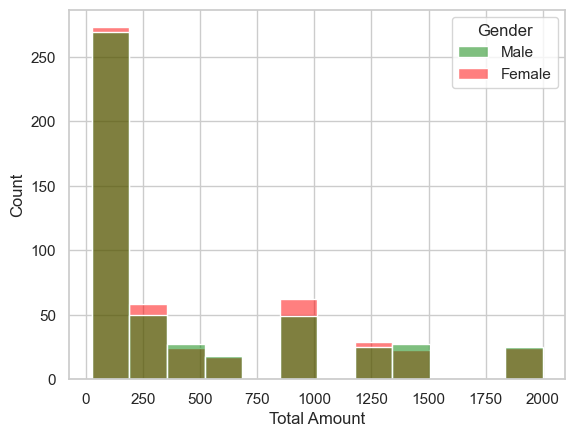

In [231]:
sns.histplot(data=df, x='Total Amount', hue='Gender',palette={"Male": "green", "Female": "red"}, stat='count') 
plt.show()

In [135]:
groupped_Age=df.groupby('Total Amount',as_index=False)['Age'].mean().sort_values(by='Age',ascending=False)
groupped_Age


,Total Amount,Age
7,120,46.232558
0,25,43.470588
6,100,43.064815
8,150,42.857143
14,1000,42.816327
10,300,42.086957
3,60,41.755556
11,500,41.686275
12,600,41.685714
2,50,41.356522


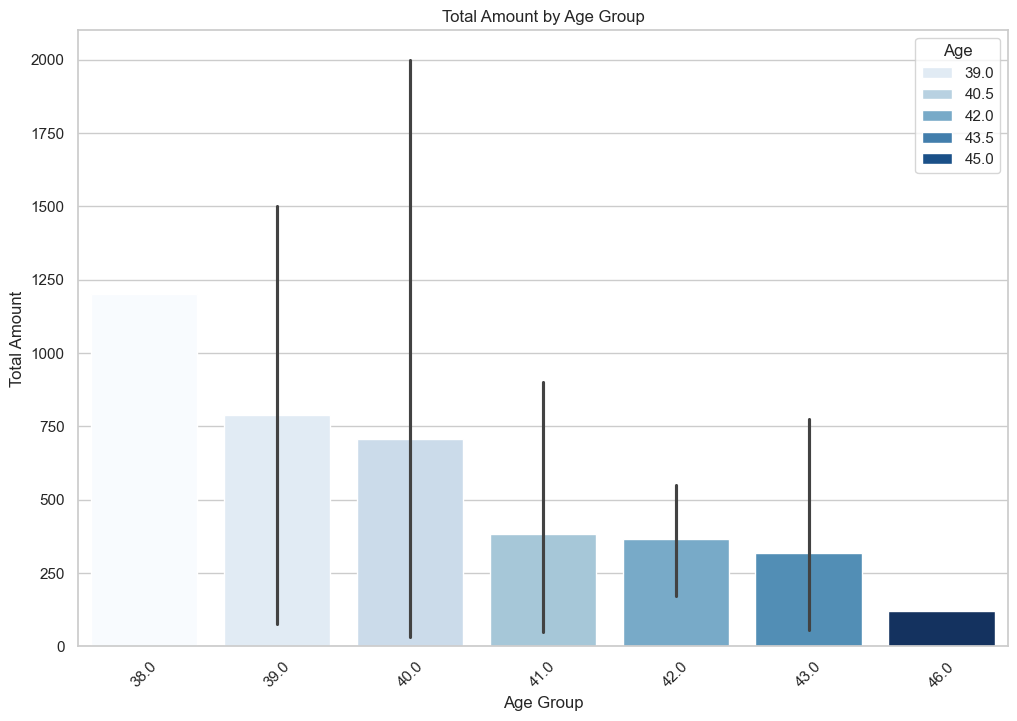

In [232]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data=groupped_Age, x=groupped_Age['Age'].round(), y='Total Amount', hue=groupped_Age['Age'].round(), palette='Blues')
# Add labels and title for clarity (optional)
plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')

# Show the plot
plt.show()


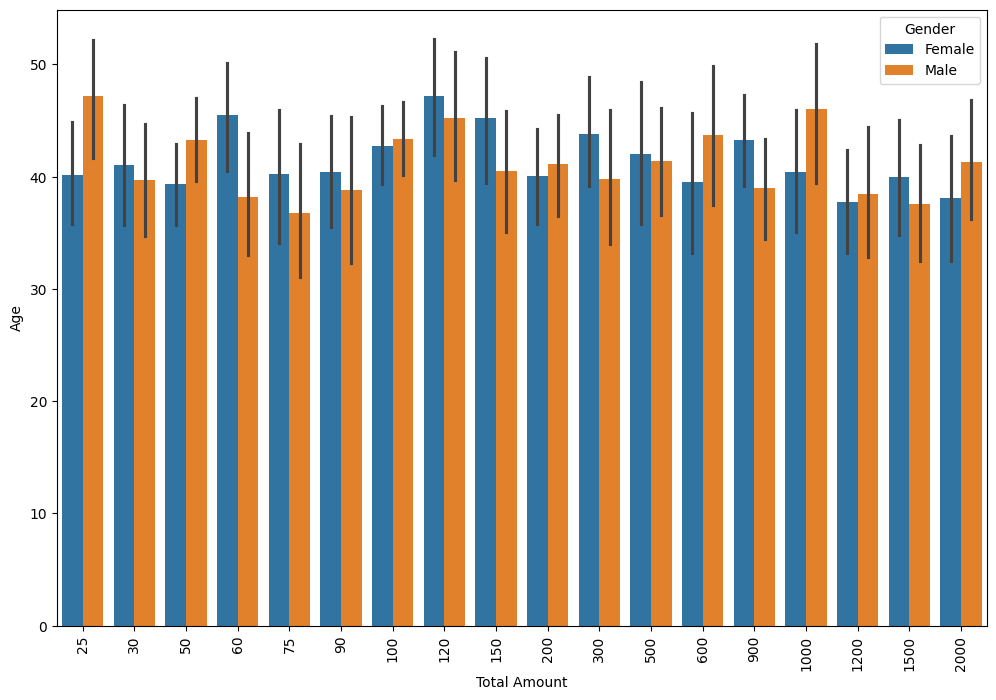

In [150]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data=df, x='Total Amount', y='Age', hue='Gender')
plt.show()

### Time series


In [184]:
date_total=df[['Total Amount','Date']]

date_total=date_total.set_index('Date')


In [185]:
date_total.groupby('Date')['Total Amount'].sum()


Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64

In [186]:
date_total.sample(5)


,Total Amount
Date,
2023-07-27,500
2023-05-02,25
2023-05-02,50
2023-07-14,2000
2023-10-02,120


In [187]:
date_total.describe()

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


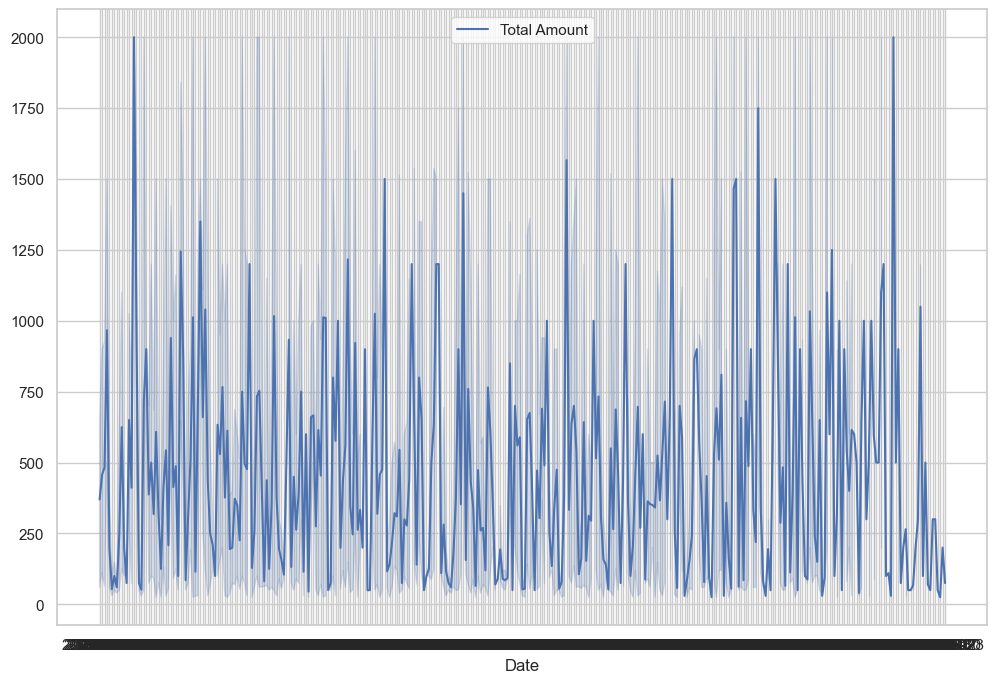

In [233]:

plt.figure(figsize=(12,8))
sns.lineplot(data=date_total)
plt.show()

# Customer vs Total Amount

In [189]:
cus_dic = {
    'ID': df['Customer ID'],
    'Total': df['Total Amount']
}
cus_dic = pd.DataFrame(cus_dic)

cus_dic = cus_dic.groupby('ID')['Total'].sum().reset_index()

cus_dic = cus_dic.sort_values(by='Total', ascending=False)

top_customers = cus_dic.head(10)
print(top_customers)

          ID  Total
487  CUST487   2000
476  CUST476   2000
773  CUST773   2000
503  CUST503   2000
92   CUST093   2000
88   CUST089   2000
946  CUST946   2000
157  CUST157   2000
155  CUST155   2000
420  CUST420   2000


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

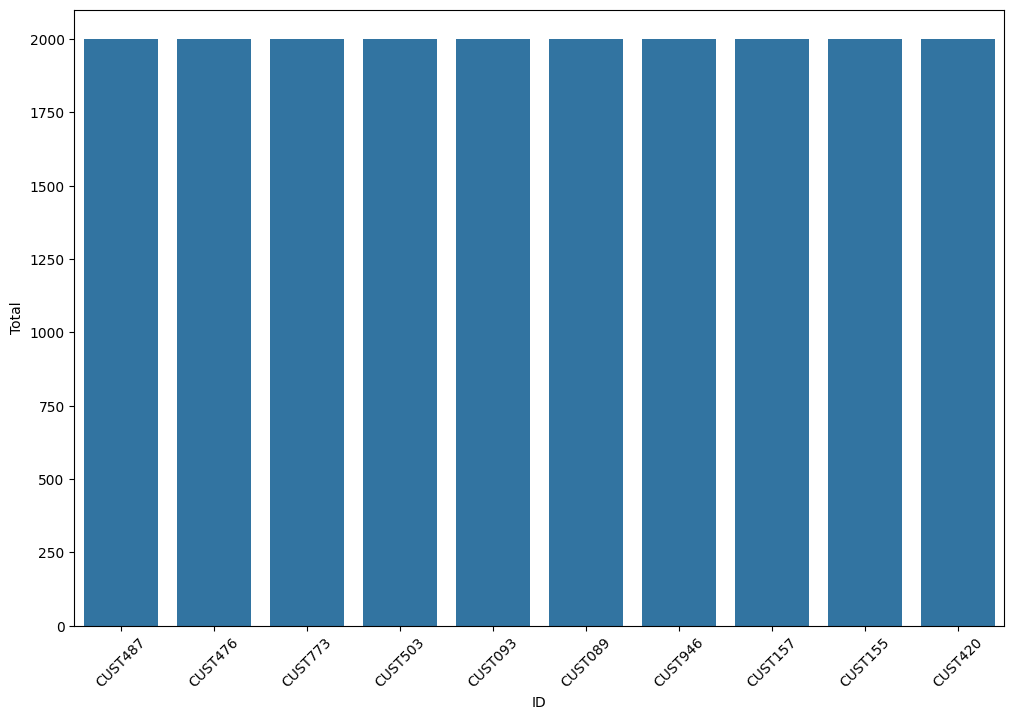

In [203]:
top_customers = top_customers.drop_duplicates(subset=['ID', 'Total'])

# Set up the plot
plt.figure(figsize=(12,8))
sns.barplot(data=top_customers, x='ID', y='Total')
# Adjust x-ticks rotation
plt.xticks(rotation=45)

# Show the plot
plt.show()
# top 10 have same values

### Multivariate Analysis
## Multivariate analysis involves examining the relationship between three or more variables at the same time. This allows us to explore more complex interactions and understand how multiple variables influence each other simultaneously.

In [204]:
multivar=df[['Date','Total Amount','Quantity']]
multivar=multivar.set_index('Date')
multivar.head()

,Total Amount,Quantity
Date,,
2023-11-24,150,3
2023-02-27,1000,2
2023-01-13,30,1
2023-05-21,500,1
2023-05-06,100,2


In [213]:

multivar.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Total Amount  1000 non-null   int64
 1   Quantity      1000 non-null   int64
dtypes: int64(2)
memory usage: 23.4+ KB


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



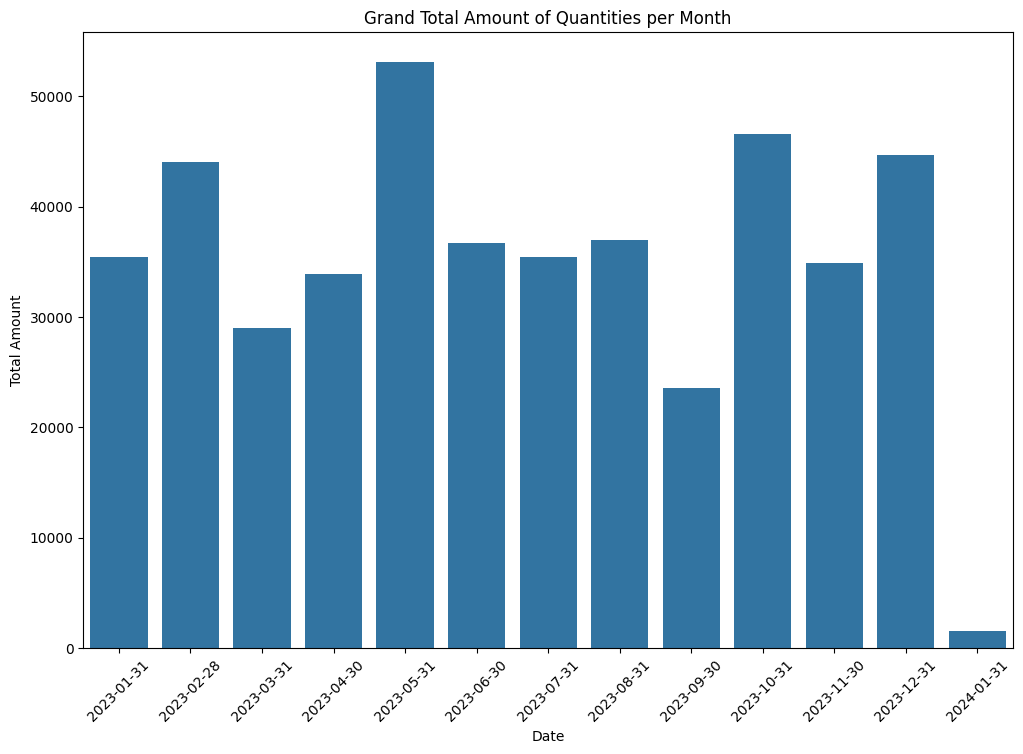

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame setup (ensure 'Date' is in datetime format)
multivar = df[['Date', 'Total Amount', 'Quantity']]

# Step 1: Convert the 'Date' column to datetime (if not already)
multivar.loc[:, 'Date'] = pd.to_datetime(multivar['Date'])

# Step 2: Set 'Date' as the index for resampling
multivar = multivar.set_index('Date')

# Step 3: Correct resampling rule to 'ME' (Month End)
multivar_monthly = multivar.resample('ME').agg({'Total Amount': 'sum', 'Quantity': 'sum'})

# Plot the data
plt.figure(figsize=(12, 8))

# Create a barplot using Seaborn
sns.barplot(data=multivar_monthly, x=multivar_monthly.index, y='Total Amount')

# Set the title for the plot
plt.title("Grand Total Amount of Quantities per Month")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
